In [1]:
import math
import numpy as np
import cmath

## General Functions

In [2]:
def to_polar(z):
    r = abs(z)
    theta = math.atan2(z.imag, z.real)
    return (r, theta* 180.0 / np.pi )

def to_complex(mag,degrees):
  rad=np.pi*degrees/180
  return np.round(cmath.rect(mag, rad),2)

def calc_parallel(x1, x2):
  return 1/((1/x1)+(1/x2))

def solve_quadratic(a, b, c):
  discriminant = b**2 - 4 * a * c

  root1 = (-b + np.sqrt(discriminant)) / (2 * a)
  root2 = (-b - np.sqrt(discriminant)) / (2 * a)

  return root1, root2

## AC Analysis

In [16]:
w = 1000*10**3
L = 1*10**-3
C = 1/((w**2)*L)
C

1e-09

In [15]:
x = complex(L/C,w*L*R)
y = complex(R, w*L-(1/(w*C)))

z = x/y

z_polar = to_polar(z)
z_polar

(2185.241611098508, 46.04162667600997)

In [8]:
z = (2)*(x)/y
to_polar(z)


(1.9955703157132179, 3.8140748342903534)

In [11]:
vamp = 6
vphase = 0
w = (0.5*10**6)
l = (6*10**-3)
c = (4*10**-9)
r1 = 3000
r2 = 2000

In [12]:
xl = complex(0, w*l)
xc = complex(0, -1/(w*c))
x1

NameError: name 'x1' is not defined

In [ ]:
req = calc_parallel(r2, xc)+r1+xl

In [ ]:
i = to_complex(vamp, vphase)/req

## Nodal and Loop Analysis

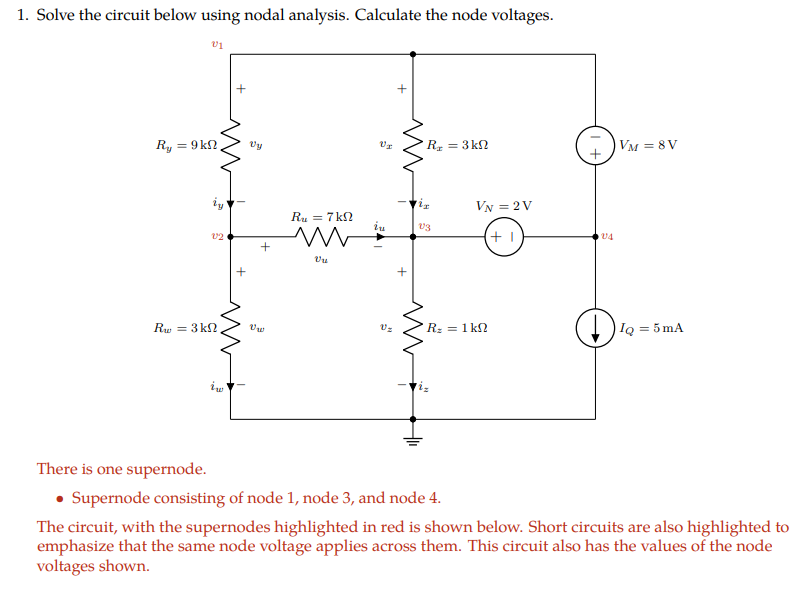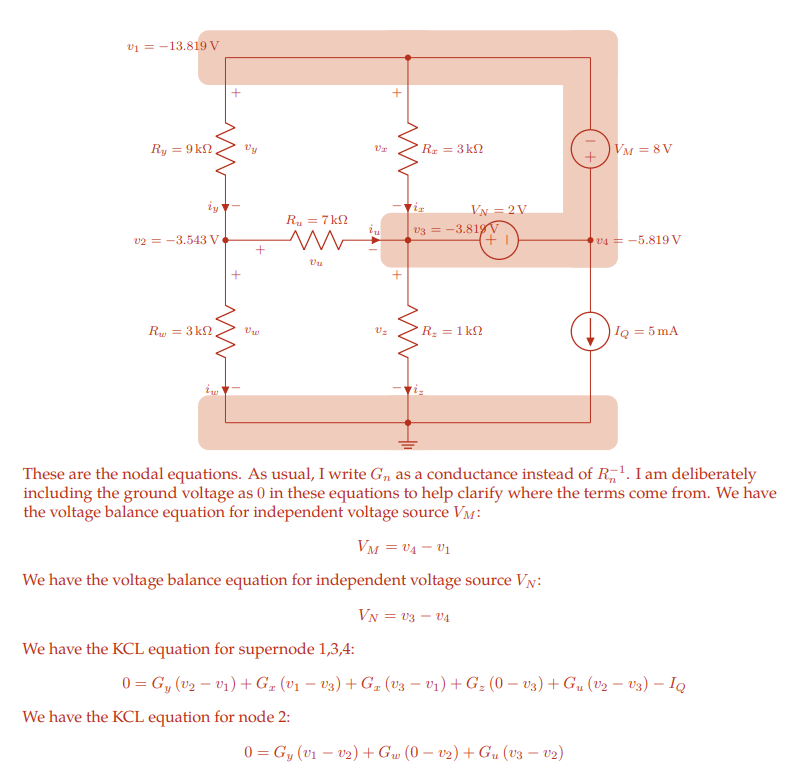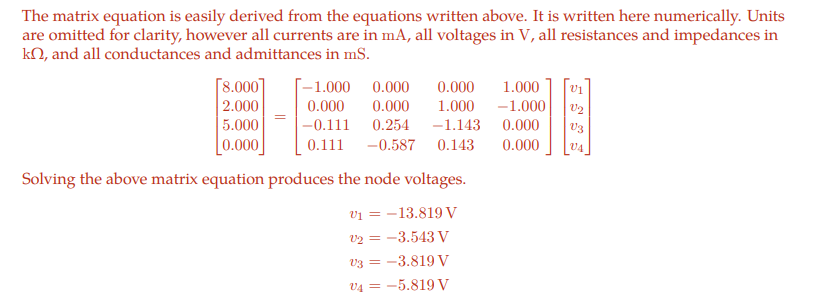

In [ ]:
# Supernode is from a node to another with only voltage sources in between.
# Analyze the end points of the super node.
# Take all currents going into the end point and divide by the resistance the current goes through on the way there.
# Take any other useful node equations.
# Take the lines of which the voltage sources lie on.
# See above images for better understanding.

A = [[11.0, 3.0, 0.0,  1.0,  2.0],\
     [ 0.0, 4.0, 2.0,  0.0,  1.0],\
     [ 3.0, 2.0, 7.0,  1.0,  0.0],\
     [ 4.0, 0.0, 4.0, 10.0,  1.0],\
     [ 2.0, 5.0, 1.0,  3.0, 14.0]]
b = [45.0, 30.0, 15.0, 20.0, 92.0]

In [ ]:
x = np.linalg.solve(A,b)
print(x)

[ 1.42390247  6.89546722 -0.62518643  1.31366319  3.66850399]


## Diodes At AC

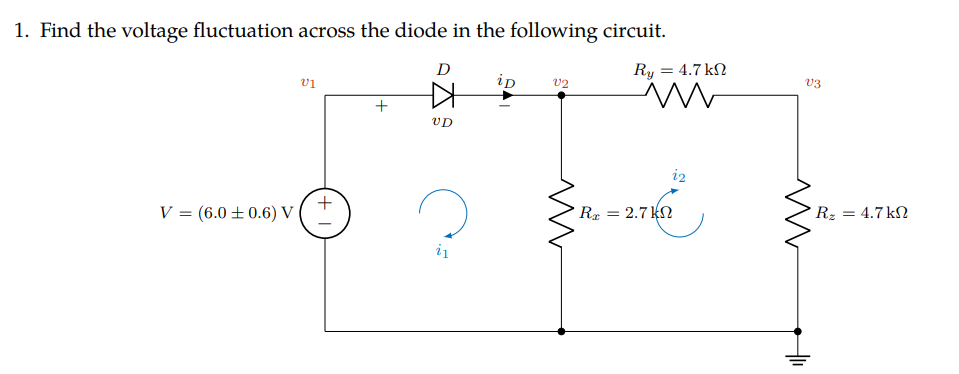

In [ ]:
V = 6
Vdiff = 0.6
Rx = 2.7
Ry = 4.7
Rz = 4.7
Vt = 0.026

# Assume Forward Biased
Vd = 0.7

A = [[Rx, -Rx],\
     [ -Rx, Rx+Ry+Rz]]
b = [V-Vd, 0]
solutionToMatrix = np.linalg.solve(A,b)

ia = solutionToMatrix[0]
ib = solutionToMatrix[1]

id = ia

rd = Vt/id

A_diff = [[rd+Rx, -Rx],\
          [ -Rx, Rx+Ry+Rz]]
b_diff = [V, 0]
solutionToMatrix_diff = np.linalg.solve(A_diff,b_diff)

ia_diff = solutionToMatrix_diff[0]
ib_diff = solutionToMatrix_diff[1]

id_diff = ia_diff

V_fluctuation = rd*id_diff

print(f'The voltage fluctuation is: {V_fluctuation} V')

The voltage fluctuation is: 0.029290274126924525 V


## Bipolar Junction Transistors

#### Cutoff Mode

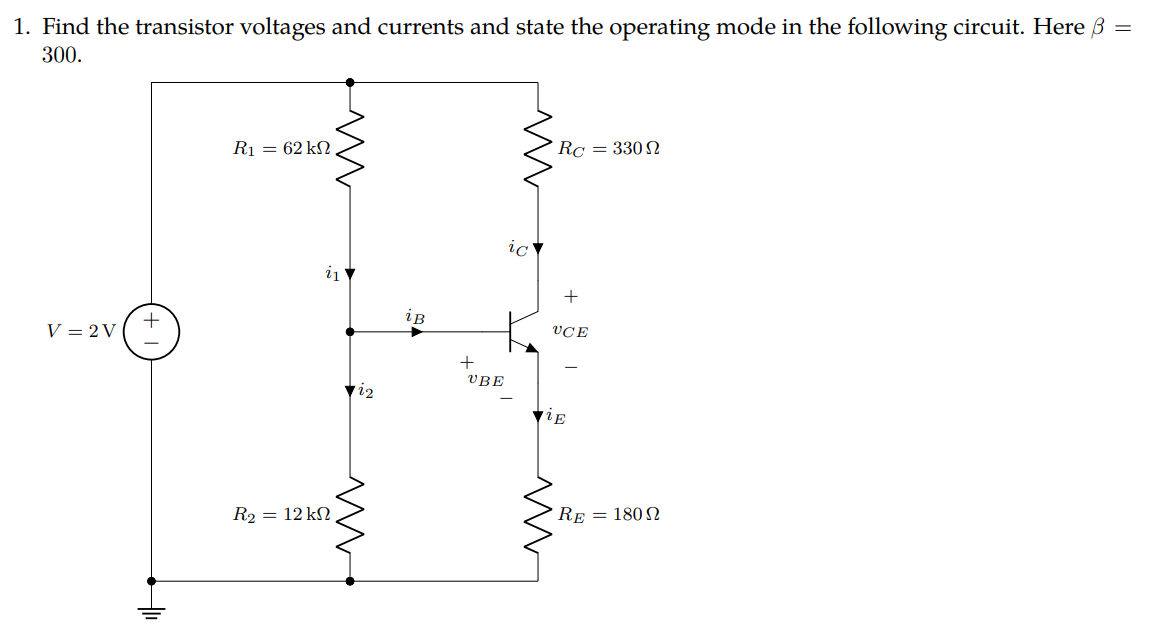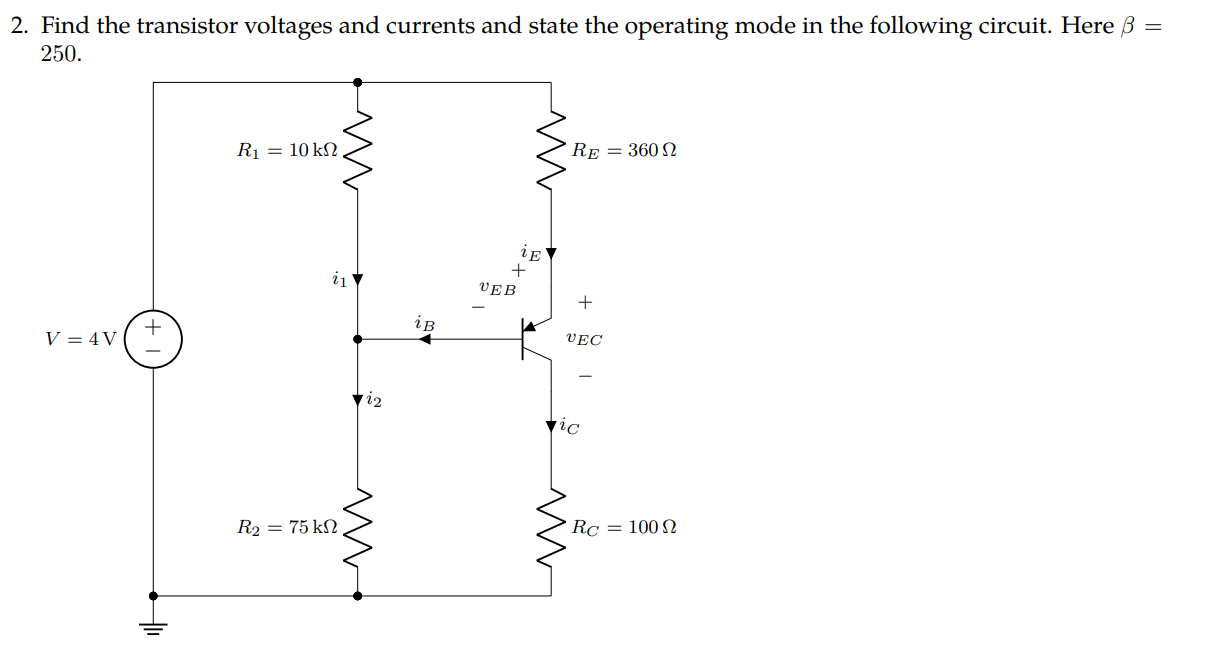

In [ ]:
V = 12
R1 = 15
R2 = 68
Rc = 0.43
Re = 0.75

# Assumed cutoff mode values
ib = 0
ic = 0
ie = 0

i_leftLoop = V/(R1+R2)

# NPN Type Similar to QUESTION 1
Vb = i_leftLoop*R2
Vbe = Vb # Vbe MUST be < 0.7v for this circuit to be in cutoff mode.
Vce = V


# PNP Type Similar to QUESTION 2
Veb = i_leftLoop*R1 # Veb MUST be < 0.7v for this circuit to be in cutoff mode.
Vec = V

if (Veb < 0.7 or Vbe < 0.7):
    cutoffMode = True
else:
    cutoffMode = False

print(f'NPN Type: (V_ce = {Vce}, V_be = {Vbe})\nPNP Type: (V_ec = {Vec}, V_eb = {Veb})\Cutoff Mode: {cutoffMode}')

NPN Type: (V_ce = 12, V_be = 9.831325301204819)
PNP Type: (V_ec = 12, V_eb = 2.1686746987951806)\Cutoff Mode: False


#### Saturation Mode

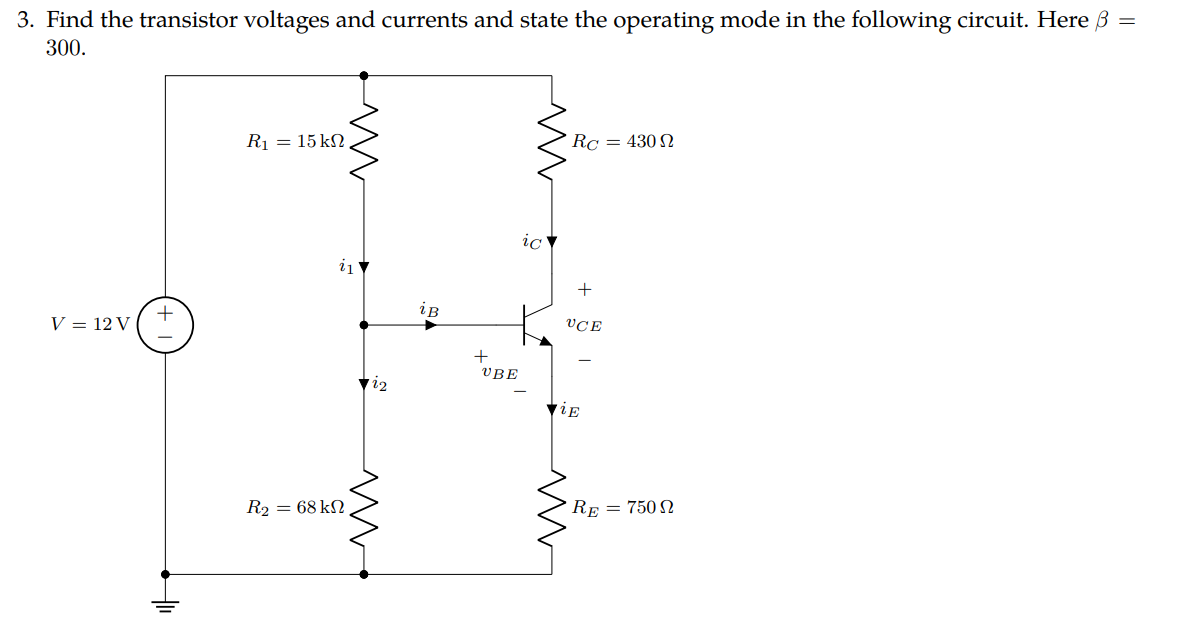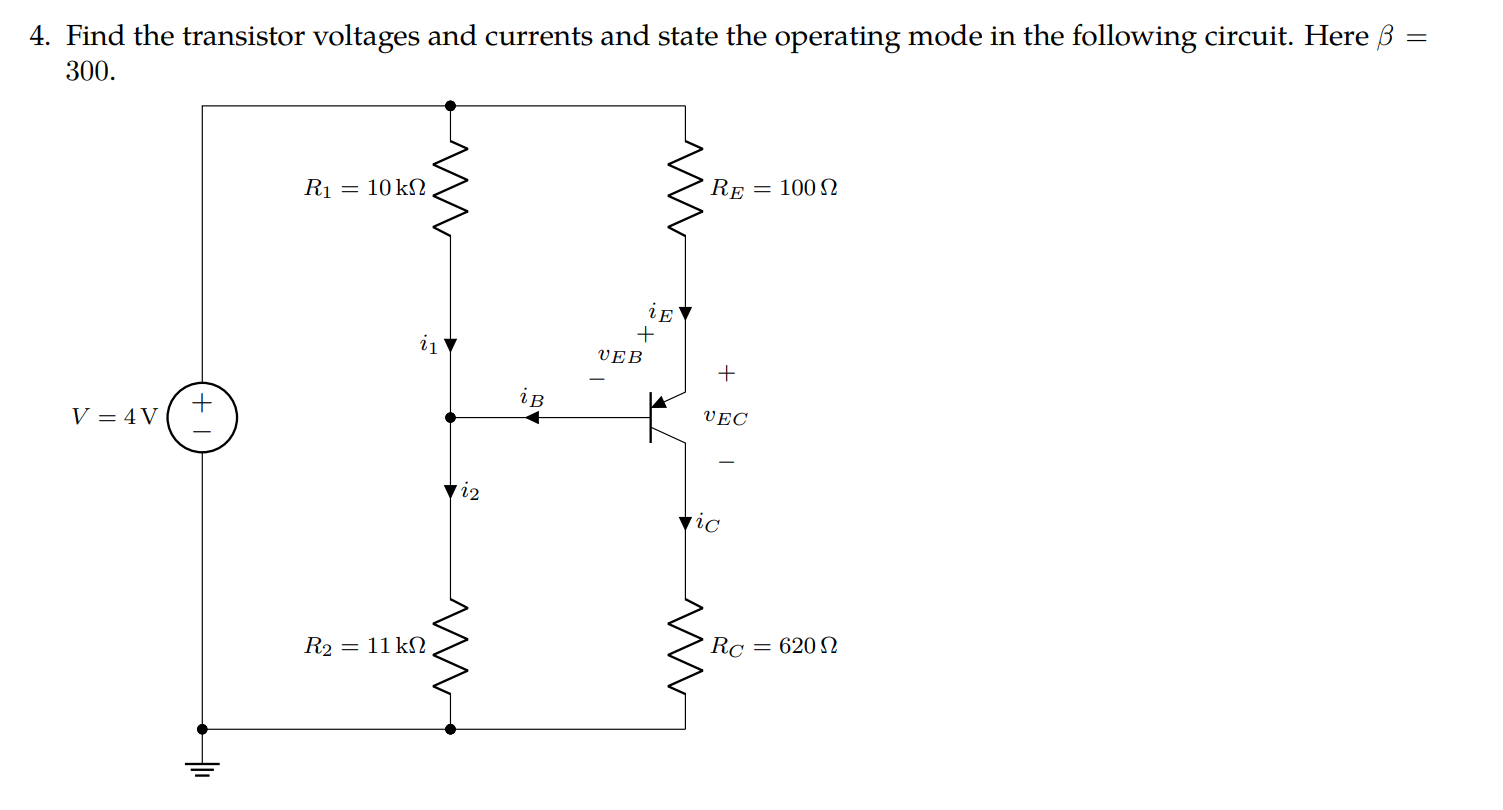

In [ ]:
V = 5
R1 = 30
R2 = 33
Rc = 0.75
Re = 0.22
B = 300

# Assumed Saturation mode values
Vbe = 0.7
Vce = 0.2
Veb = 0.7
Vec = 0.2


# NPN Type Similar to QUESTION 3

A_npn = [[R1+R2, -R1, -R2],\
     [ -R1, R1+Rc, 0],\
     [ -R2, 0, Re+R2]]
b_npn = [V, Vbe-Vce, -Vbe]

solutionToMatrix_npn = np.linalg.solve(A_npn,b_npn)

i_leftLoop_npn = solutionToMatrix_npn[0]
i_topRightLoop_npn = solutionToMatrix_npn[1]
i_BottomRightLoop_npn = solutionToMatrix_npn[2]

ic_npn = i_topRightLoop_npn
ie_npn = i_BottomRightLoop_npn
ib_npn = ie_npn - ic_npn

# PNP Type Similar to QUESTION 4

A_pnp = [[R1+R2, -R1, -R2],\
     [ -R1, R1+Re, 0],\
     [ -R2, 0, Rc+R2]]
b_pnp = [V, -Veb, Veb-Vec]

solutionToMatrix_pnp = np.linalg.solve(A_pnp,b_pnp)

i_leftLoop_pnp = solutionToMatrix_pnp[0]
i_topRightLoop_pnp = solutionToMatrix_pnp[1]
i_BottomRightLoop_pnp = solutionToMatrix_pnp[2]

ic_pnp = i_BottomRightLoop_pnp # i_c MUST be < B*i_b
ie_pnp = i_topRightLoop_pnp
ib_pnp = ie_pnp - ic_pnp

if (ic_pnp < B*ib_pnp or ic_npn < B*ib_npn):
    saturationMode = True
else:
    saturationMode = False

print(f'NPN Type: (i_e = {ie_npn}, i_b = {ib_npn}, i_c = {ic_npn})\nPNP Type: (i_e = {ie_pnp}, i_b = {ib_pnp}, i_c = {ic_pnp})\nSaturation Mode: {saturationMode}')

NPN Type: (i_e = 4.9888739511380615, i_b = 0.052276976805276654, i_c = 4.936596974332785)
PNP Type: (i_e = 4.977284316906923, i_b = 0.037287716533000115, i_c = 4.939996600373923)
Saturation Mode: True


#### Active Mode

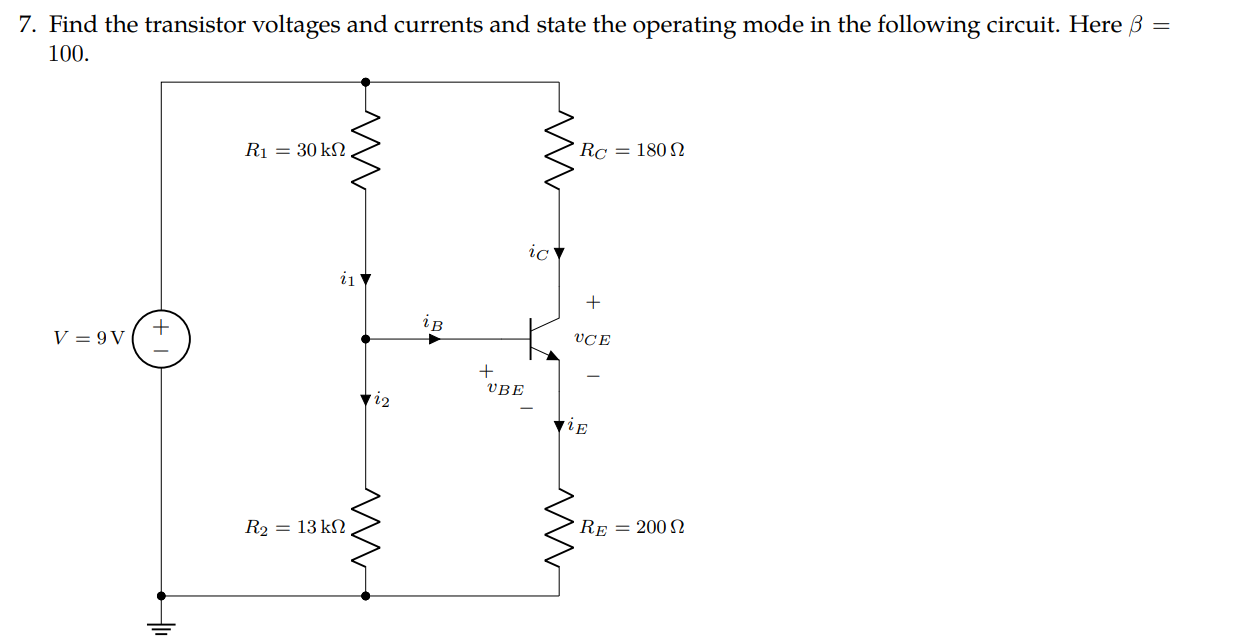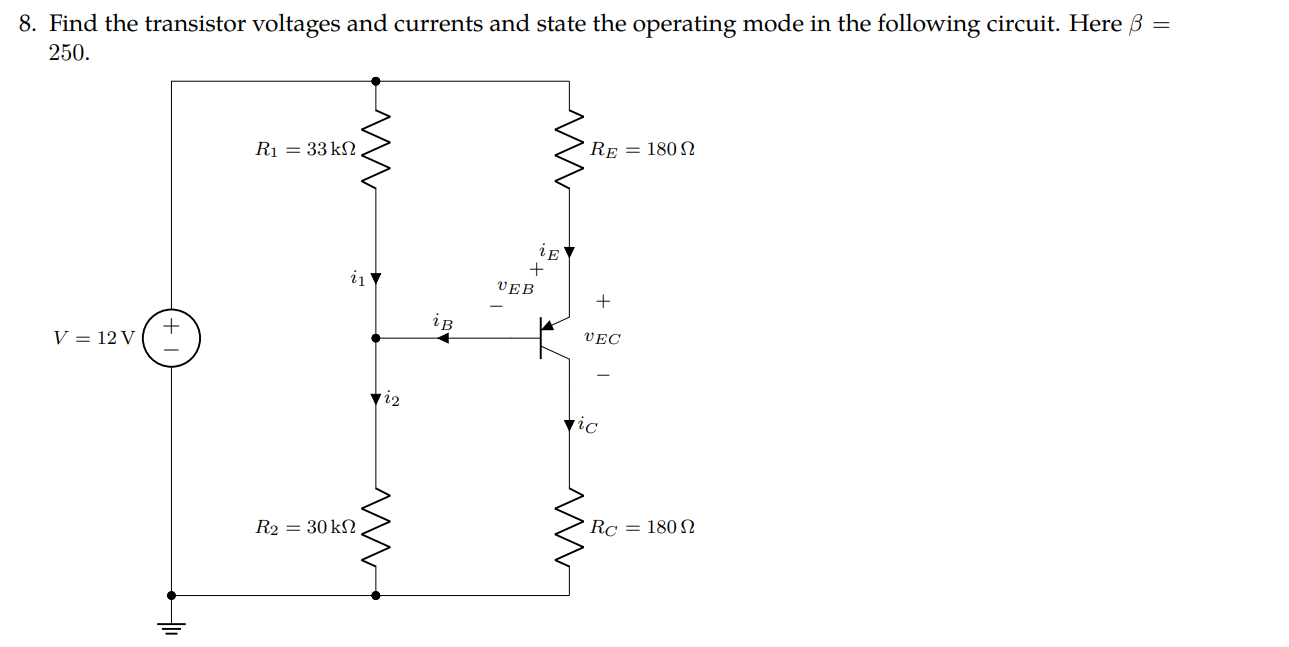

In [22]:
Vx = 13
Vy = 12
R2 = 150
Rc = 4.3
Re = 1.2
# Rl = 4
R1 = 0
V = 0
B = 300
Vt = 0.026

# Assumed Active mode values
Vbe = 0.7
Veb = 0.7


# NPN Type Similar to QUESTION 7

A_npn = [[R1+R2, R1, 0],\
     [ -R1, -R1+(Rc*B), 1],\
     [ -R2, Re*(1+B), 0]]
b_npn = [V, Vbe, -Vbe]

solutionToMatrix_npn = np.linalg.solve(A_npn,b_npn)

i2_npn = solutionToMatrix_npn[0]
ib_npn = solutionToMatrix_npn[1]
Vce = solutionToMatrix_npn[2] # V_CE MUST be > 0.3 V

ie_npn = (1+B)*ib_npn
ic_npn = B*ib_npn


# PNP Type Similar to QUESTION 8

A_pnp = [[(Re/B)+Re+Rc, 1],\
     [ (-R2/B)+Rc, 1]]
b_pnp = [Vx, Vy+Veb]

solutionToMatrix_pnp = np.linalg.solve(A_pnp,b_pnp)

ic_pnp = solutionToMatrix_pnp[0]
Vec = solutionToMatrix_pnp[1] # V_EC MUST be > 0.3 V
ic_pnp, Vec, ic_pnp/B, (ic_pnp/B)+ic_pnp
# ie_pnp = (1+B)*ib_pnp
# ic_pnp = B*ib_pnp


# if (Vec > 0.3 or Vce > 0.3):
#     activeMode = True
# else:
#     activeMode = False

# print(f'NPN Type: (i_e = {ie_npn}, i_b = {ib_npn}, i_c = {ic_npn}, V_CE = {Vce})\nPNP Type: (i_e = {ie_pnp}, i_b = {ib_pnp}, i_c = {ic_pnp}, V_EC = {Vec})\nactive Mode: {activeMode}')

(0.17605633802816945,
 12.030985915492955,
 0.0005868544600938981,
 0.17664319248826335)

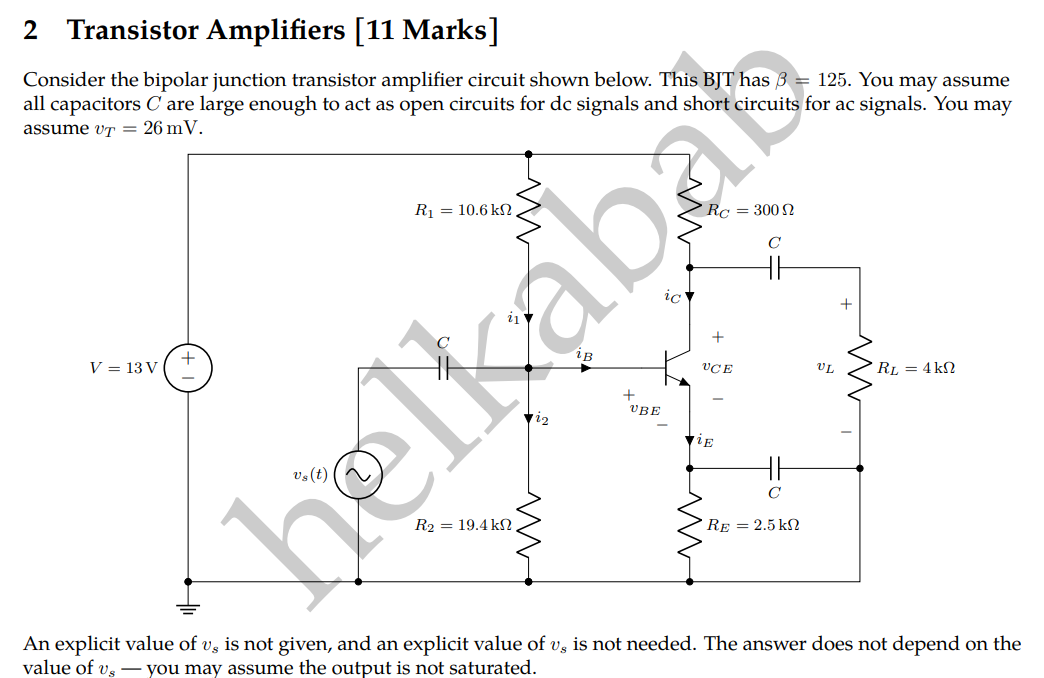

In [ ]:
# AC Analysis for Amplifiers with Active BJT
Vt = 0.026
gm = ic_npn/Vt
rpi = B/gm
Av = -gm*((Rl*Rc)/(Rl+Rc))
G = 20*np.log10(np.absolute(Av))
gm, Av, G

(115.11805137085283, -32.125967824424045, 30.137124401168638)

## Field-Effect Transistors



#### Cutoff Region

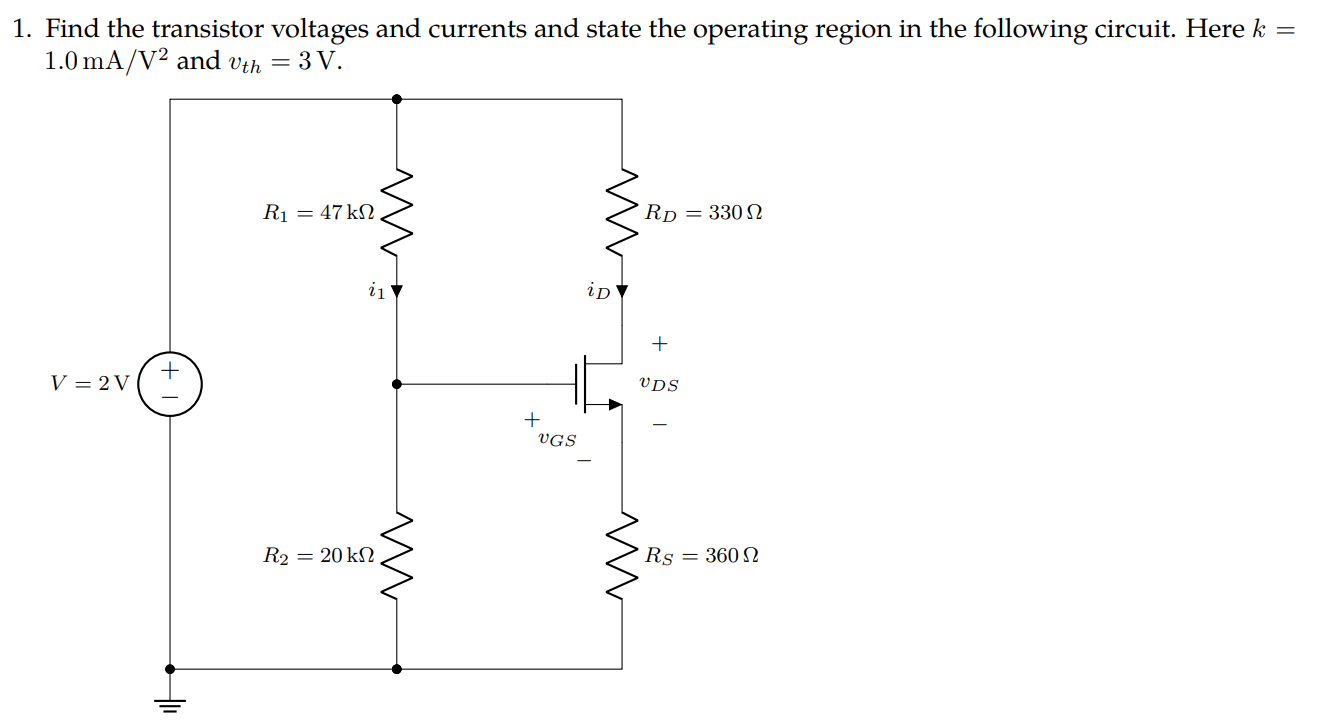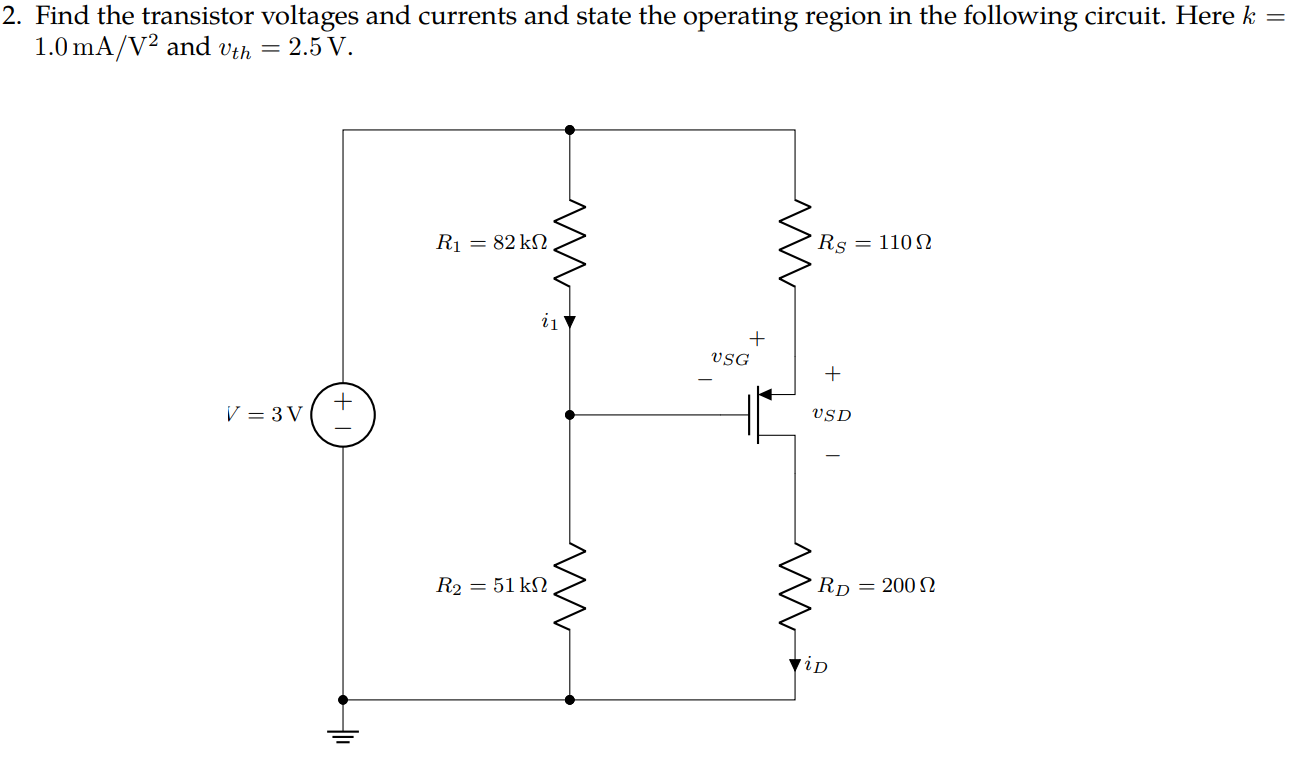

In [ ]:
V = 8
R1 = 36
R2 = 24
Rd = 0.43
Rs = 0.18
k = 2.5
Vth = 2

# Assumed cutoff region values
id = 0


# NFET Similar to QUESTION 1
Vds = V
i1 = V/(R1+R2)
Vg = i1*R2
Vgs = Vg # V_GS MUST be <= V_th for this circuit to be in cutoff mode.


# PFET Type Similar to QUESTION 2
Vsd = V
i1 = V/(R1+R2)
Vg = i1*R1
Vsg = Vg # V_GS MUST be <= V_th for this circuit to be in cutoff mode.


print(f'NFET Type: (i_1 = {i1}, V_GS = {Vgs}, V_DS = {Vds})\nPFET Type: (i_1 = {i1}, V_SG = {Vsg}, V_SD = {Vsd})')

NFET Type: (i_1 = 0.13333333333333333, V_GS = 3.2, V_DS = 8)
PFET Type: (i_1 = 0.13333333333333333, V_SG = 4.8, V_SD = 8)


#### Saturation Region

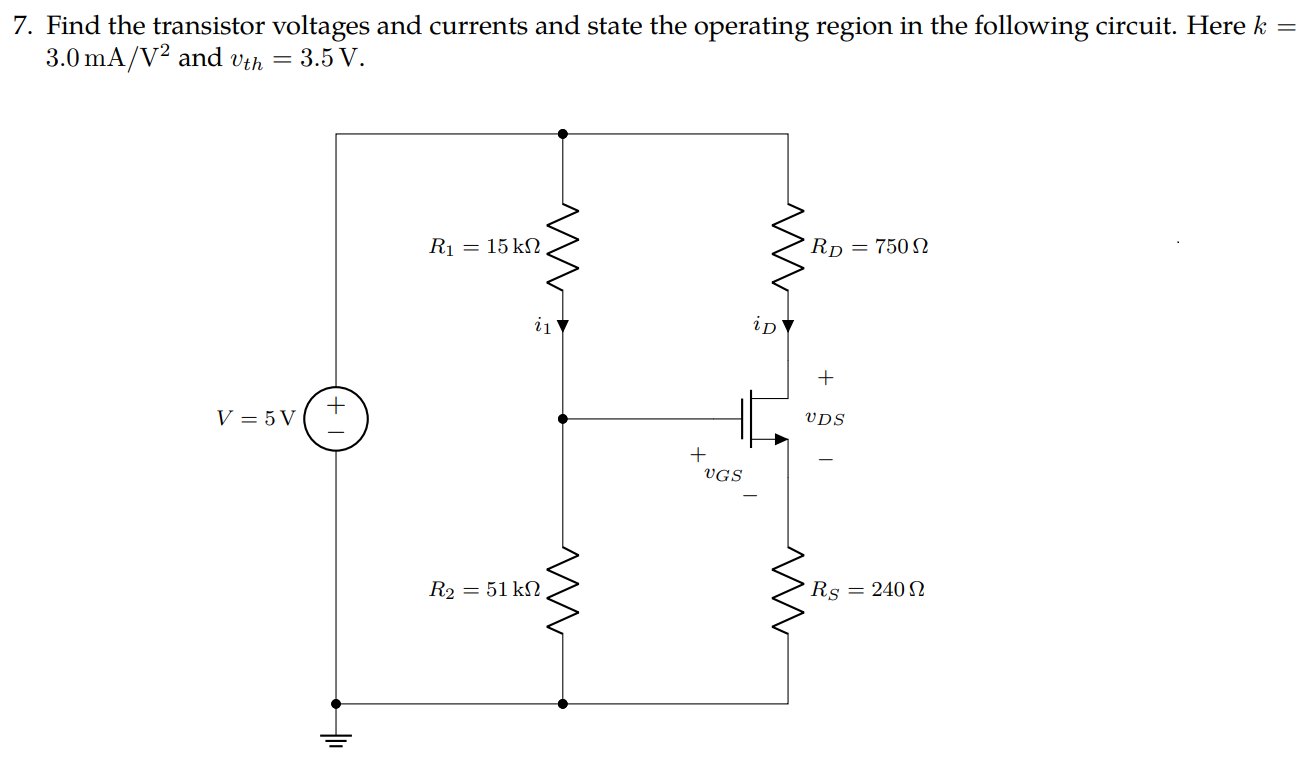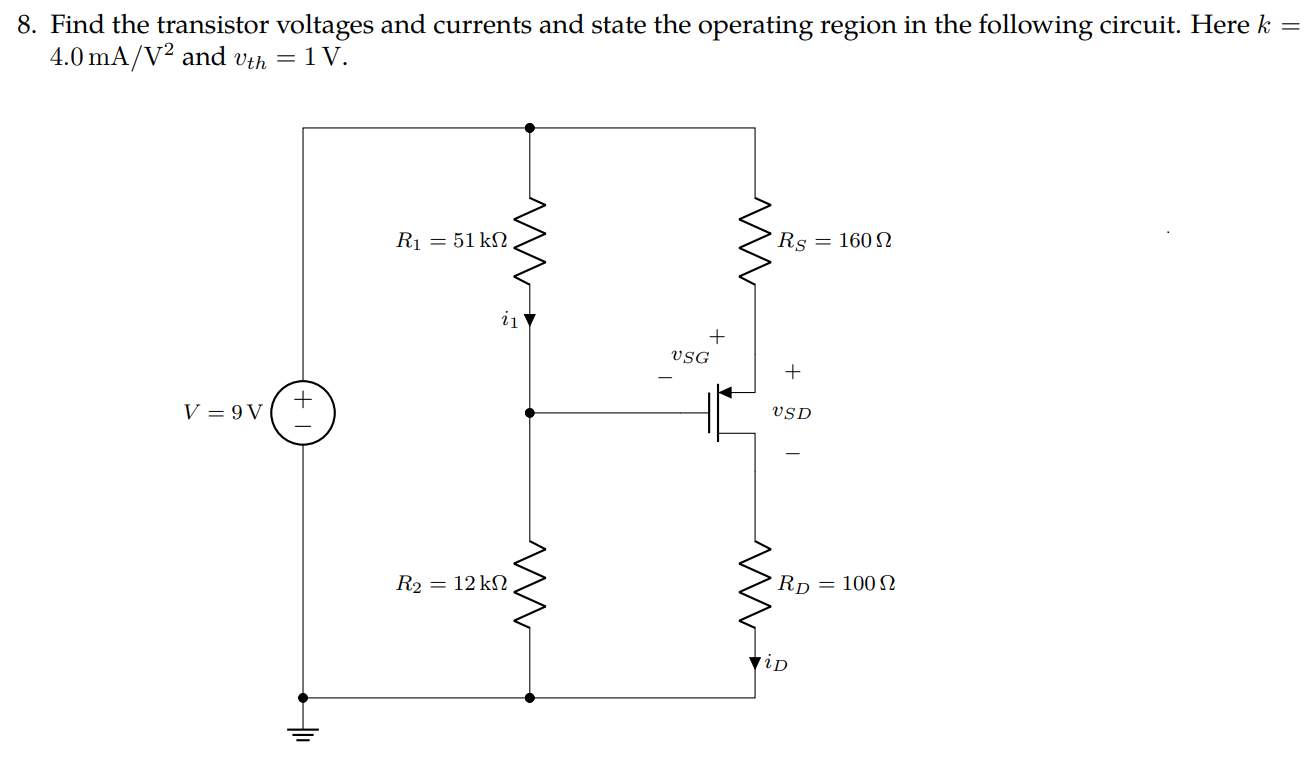

In [ ]:
V = 8
R1 = 36
R2 = 24
Rd = 0.43
Rs = 0.18
k = 2.5
Vth = 2

# NFET Type Similar to QUESTION 7

i1 = V/(R1+R2)
Vg = i1*R2

roots = solve_quadratic(0.5*k*Rs, 1, -(Vg - np.absolute(Vth)))

Vov_NFET = None
for i in roots:
    if np.isreal(i) and i >= 0:
        if Vov_NFET is None or i < Vov_NFET:
            Vov_NFET = i

if Vov_NFET is not None:
    print("Non-negative root found: Vov_NFET =", Vov_NFET)
else:
    print("No non-negative real root found")

Vgs_NFET = Vov_NFET + Vth
id_NFET = 0.5*k*((Vgs_NFET-Vth)**2)
Vds_NFET = V - id_NFET*Rd - id_NFET*Rs

p_NFET = Vds_NFET*id_NFET

# PNP Type Similar to QUESTION 8

i1 = V/(R1+R2)
Vg = i1*R2

roots = solve_quadratic(0.5*k*Rs, 1, -(V - Vg - np.absolute(Vth)))

Vov_PFET = None
for i in roots:
    if np.isreal(i) and i >= 0:
        if Vov_PFET is None or i < Vov_PFET:
            Vov_PFET = i

if Vov_PFET is not None:
    print("Non-negative root found: Vov_PFET =", Vov_PFET)
else:
    print("No non-negative real root found")

Vsg_PFET = Vov_PFET + np.absolute(Vth)
id_PFET = 0.5*k*((Vsg_PFET-np.absolute(Vth))**2)
Vsd_PFET = V - id_PFET*Rd - id_PFET*Rs

p_PFET = Vsd_PFET*id_PFET

print(f'NPN Type: (i_1 = {i1}, V_GS = {Vgs_NFET}, i_d = {id_NFET}, Vds_NFET = {Vds_NFET}, Power Dissipated = {p_NFET})\nPNP Type: (i_1 = {i1}, V_GS = {Vsg_PFET}, i_d = {id_PFET}, V_DS = {Vsd_PFET}, Power Dissipated = {p_PFET})')

Non-negative root found: Vov_NFET = 0.9827122448568797
Non-negative root found: Vov_PFET = 1.9470362309541596
NPN Type: (i_1 = 0.13333333333333333, V_GS = 2.98271224485688, i_d = 1.2071541952395604, Vds_NFET = 7.2636359409038675, Power Dissipated = 8.768328598754955)
PNP Type: (i_1 = 0.13333333333333333, V_GS = 3.9470362309541596, i_d = 4.738687605810224, V_DS = 5.1094005604557635, Power Dissipated = 24.211853108951537)


In [ ]:
V = 17
R1 = 165
# R2 = 24
# Rd = 0.43
# Rs = 0.18
k = 3.5
Vth = 3

# NFET Type Similar to QUESTION 7

i1 = V/(R1+R2)
Vg = i1*R2

roots = solve_quadratic(0.5*k*Rs, 1, -(Vg - np.absolute(Vth)))

Vov_NFET = None
for i in roots:
    if np.isreal(i) and i >= 0:
        if Vov_NFET is None or i < Vov_NFET:
            Vov_NFET = i

if Vov_NFET is not None:
    print("Non-negative root found: Vov_NFET =", Vov_NFET)
else:
    print("No non-negative real root found")

Vgs_NFET = Vov_NFET + Vth
id_NFET = 0.5*k*((Vgs_NFET-Vth)**2)
Vds_NFET = V - id_NFET*Rd - id_NFET*Rs

p_NFET = Vds_NFET*id_NFET

print(f'NPN Type: (i_1 = {i1}, V_GS = {Vgs_NFET}, i_d = {id_NFET}, Vds_NFET = {Vds_NFET}, Power Dissipated = {p_NFET})')

## Practice Final

#### Question 1

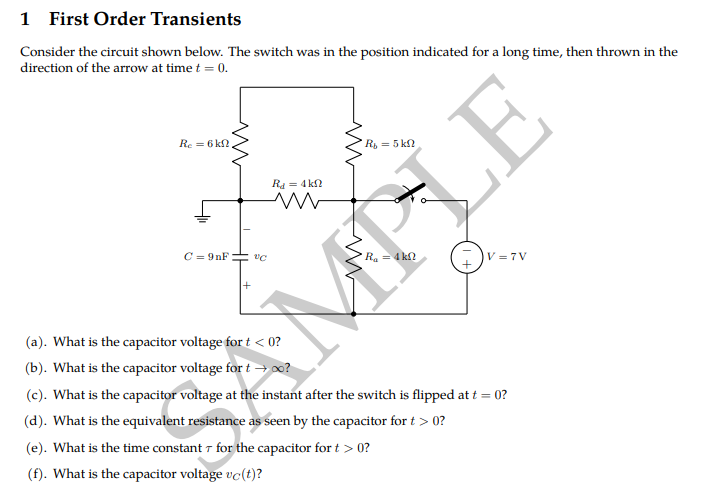

In [ ]:
V = 7
Ra = 4
Rb = 5
Rc = 6
Rd = 4
C = 9

# For question a:
  # Switch is open, therefore the voltage source is on an open circuit.
  # No voltage is reaching the rest of the circuit and the capacitor discharges on one of the resistors completely

Vc_before_0 = 0

# For question b:
  # Switch is in steady state, meaning the switch has been closed for a while and the capacitor is an open circuit.
  # Since the capacitor is an open circuit, there is no current through the resistors b, c, and d.
  # Meaning the voltage source is essentially in parallel with Ra, and Vc.

Vc_at_infinity = V

# For question c:
  # Not enough time to change anything for the capacitor voltage from when it was before 0.

Vc_at_0 = Vc_before_0

# For question d:
  # To find Req, treat the voltage source as a short circuit.

Req_after_0 = calc_parallel(Rd, Rb+Rc)

# For question e:
  # Simple equation: T = Req*C for capacitors and T = Req/L for Inductors

T = Req_after_0*C

# For question f:
  # Plug into the equation the values Vc(t) = V*(1 - exp(-t/T))

Vc_before_0, Vc_at_infinity, Vc_at_0, Req_after_0, T

(0, 7, 0, 2.933333333333333, 26.4)

#### Question 2

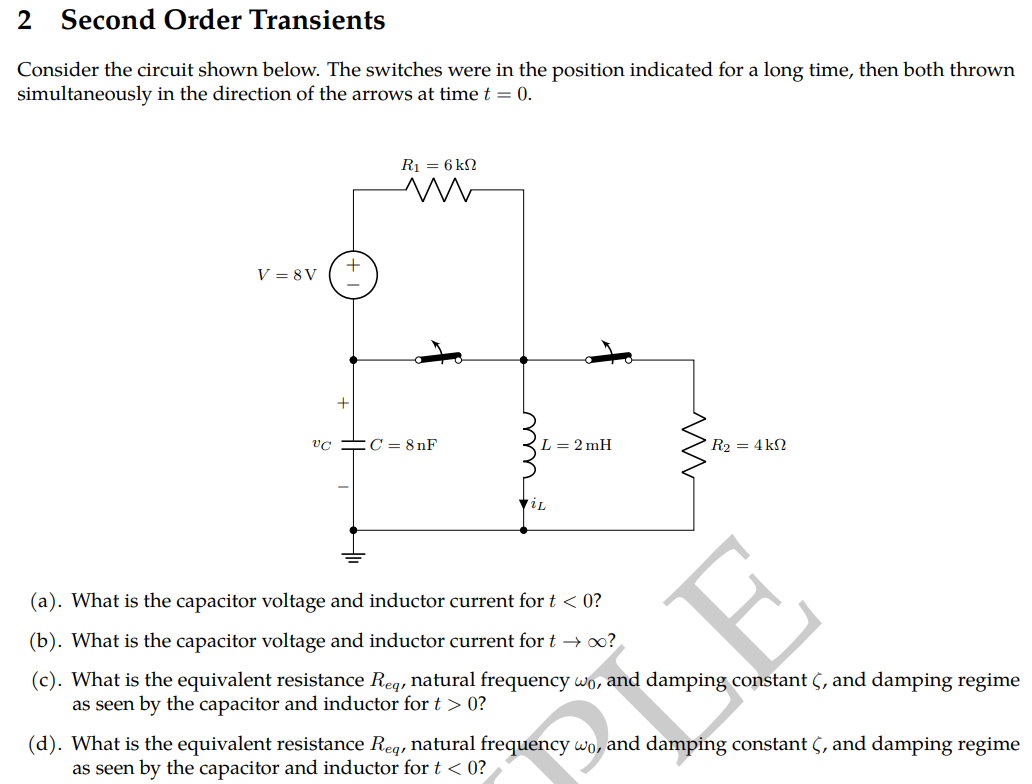

In [ ]:
V = 8
R1 = 6
R2 = 4
C = 8
L = 2


# For question a:
  # Both switches closed for a while, Capcitor is an open circuit and Inductor is a short circuit.
  # Everything would go through the Left switche and back up to resistor 1.

Vc_before_0 = 0
il_before_0 = 0

# For question b:
  # Both switches open, capacitor open circuit, and inductor short circuit. No current throughout the entire circuit.
  # Re-draw the circuit to realize that Vc = -V

Vc_at_infinity = -V

# For question c:
  # Plug and chug into the equations

Req = R1 # Since the right switch makes everything an open circuit on the right, so we just have one loop.

W0 = 1/np.sqrt(C*L)
damping_constant_after_0 = (Req/2)*np.sqrt(C/L)

# For question d:
  # R1 is short circuitted so we can ignore it.
  # Setup the differential equation and ask chatGPT to solve it.
  # W0 is the same as part c.

Req = R2
damping_constant_before_0 = ((1/(2*Req))*np.sqrt(L/C))



#### Question 4

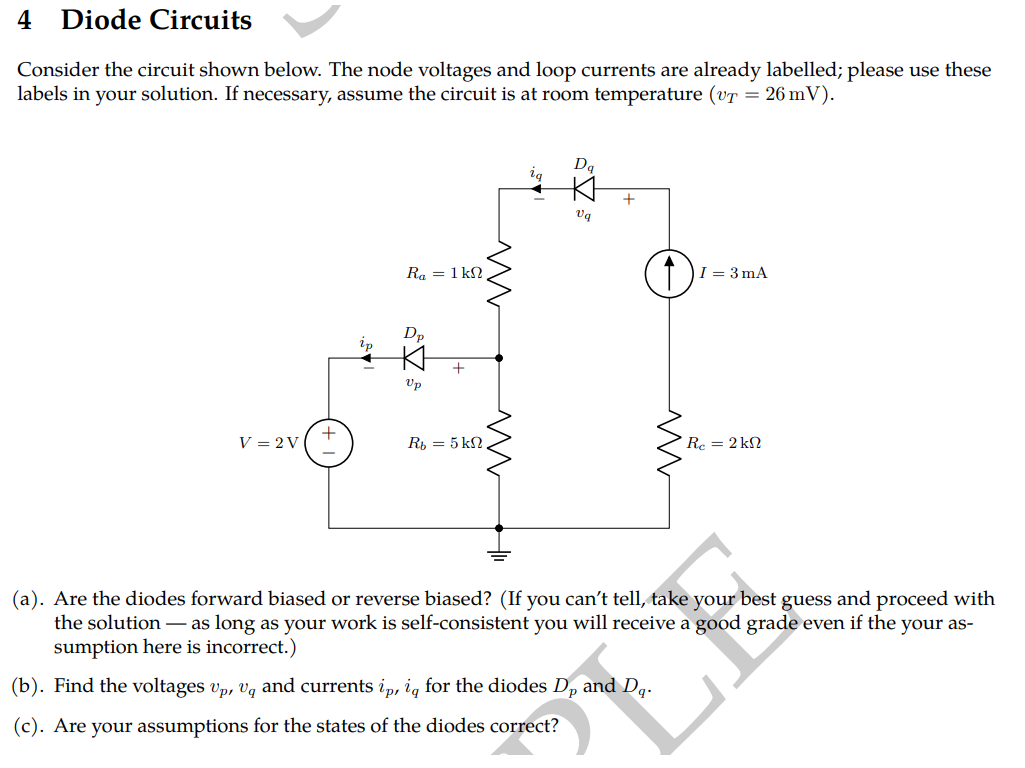

In [ ]:
V = 2
Ra = 1
Rb = 5
Rc = 2
I = 3

# Assumptions
  # True means forward and False means Reverse
Dp_bias = 'Forward'
Dq_bias = 'Forward'



if Dp_bias == 'Forward' and Dq_bias == 'Reverse':

  Vdp = 0.7 # idp MUST be > 0
  idq = 0 # Vdq MUST be < 0.7

  V_center_node = V + Vdp
  Vdq = V_center_node
  idp = (-V-Vdp)/(-Rb)

  if idp <= 0:
    print(f'Try another assumption, idp = {idp} <= 0')
  elif Vdq >= 0.7:
    print(f'Try another assumption, Vdq = {Vdq} >= 0.7')
  else:
    print(f'Assumption was correct, Dp is Forward Biased and Dq is Reverse Biased\nCalculated values are: Vdq = {Vdq}, idq = {idq}, Vdq = {Vdq}, idp = {idp}')


elif Dp_bias == 'Reverse' and Dq_bias == 'Reverse':

  idp = 0 # Vdp MUST be < 0.7
  idq = 0 # Vdq MUST be < 0.7

  Vdp = 2
  Vdq = 'Unknown'

  if Vdp >= 0.7 or Vdq >= 0.7:
    print(f'Try another assumption, Vdp or Vdq is >= 0.7')
  else:
    print(f'Assumption was correct, Dp is Reverse Biased and Dq is Reverse Biased\nCalculated values are: Vdq = {Vdq}, idq = {idq}, Vdq = {Vdq}, idp = {idp}')


elif Dp_bias == 'Forward' and Dq_bias == 'Forward':

  Vdp = 0.7 # idp MUST be > 0
  Vdq = 0.7 # idq MUST be > 0
  idq = I
  ib = (V+Vdp)/5
  idp = idq - ib

  if idp <= 0:
    print(f'Try another assumption, idp = {idp} <= 0')
  elif idq <= 0:
    print(f'Try another assumption, idq = {idq} <= 0')
  else:
    print(f'Assumption was correct, Dp is Forward Biased and Dq is Forward Biased\nCalculated values are: Vdq = {Vdq}, idq = {idq}, Vdq = {Vdq}, idp = {idp}')


Assumption was correct, Dp is Forward Biased and Dq is Forward Biased
Calculated values are: Vdq = 0.7, idq = 3, Vdq = 0.7, idp = 2.46


#### Question 5

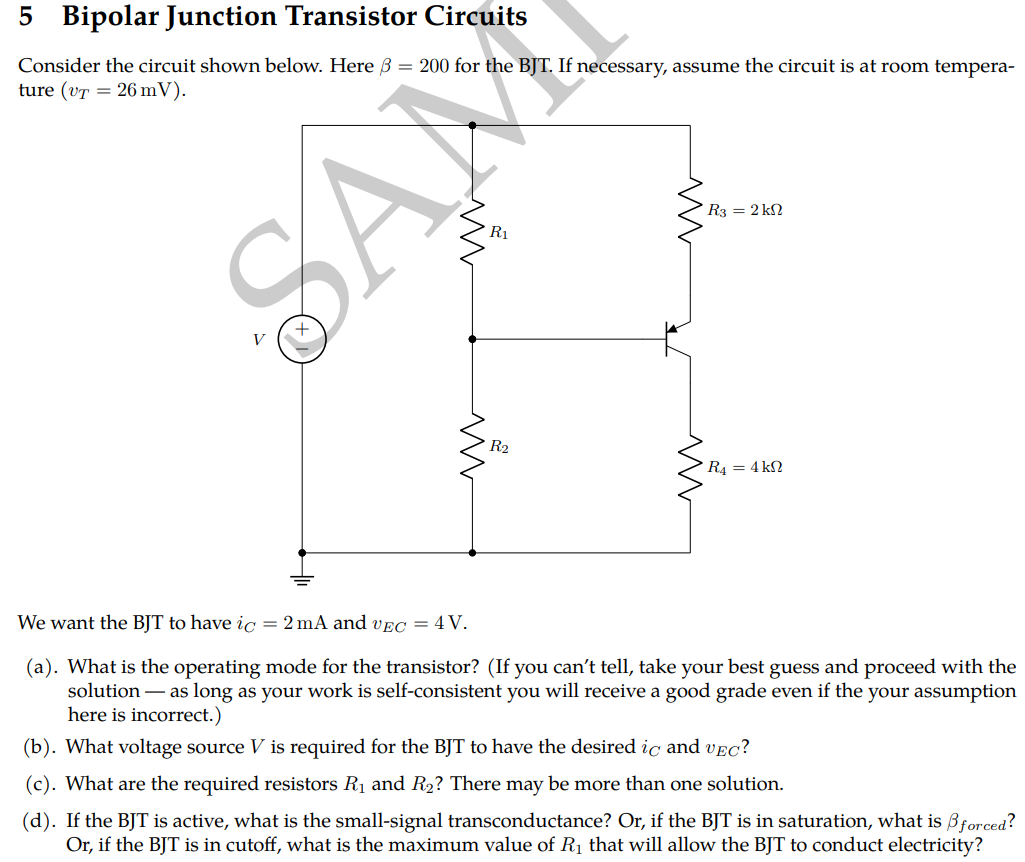

In [ ]:
# To have Vec = 4, and ic = 2, this transistor must be in active mode.

Rc = 4
Re = 2
B = 200
Vt = 0.026
ic = 2
Vec = 4

# Assumed Saturation mode values
Veb = 0.7
ib = ic/B
ie = ic + ib

Ve = ie*Re
Vc = ic*Rc
V1 = Ve + Veb
V2 = V - V1

V = Ve + Vc + Vec

# We have 3 loop equations, but 4 unknowns, so we must assume a value for one of the unknowns.
i1 = 1 # Assume i1 = 1

i2 = i1 + ib
R1 = V1/i1
R2 = V2/i2

gm = ic/Vt


print(f'Calculated Values: (V = {V}, R1 = {R1}, R2 = {R2:.2f}, Small-Signal Transconductance = {gm:.2f})')

Calculated Values: (V = 16.02, R1 = 4.72, R2 = -2.69, Small-Signal Transconductance = 76.92)


#### Question 6

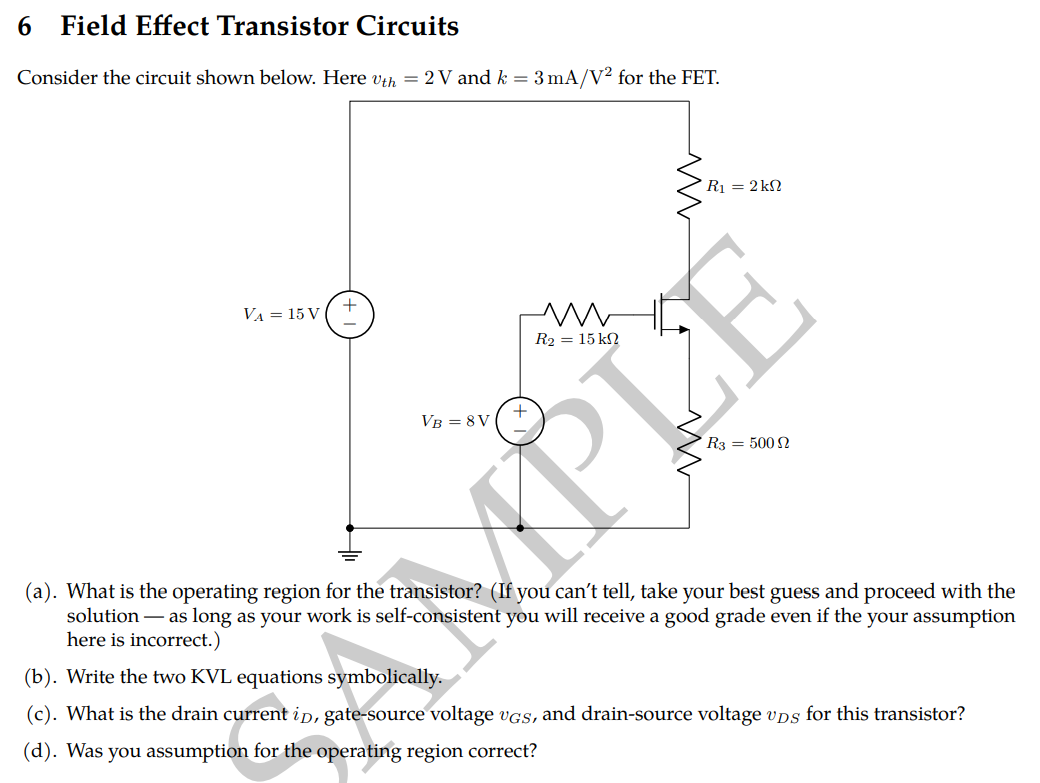

In [ ]:
Va = 15
Vb = 8
R2 = 15
Rd = 2
Rs = 0.5
k = 3
Vth = 2
region_assumption = 'Saturation'


if region_assumption == 'Cutoff':

  # Assumed cutoff region values
  id = 0

  Vds = V
  Vg = Vb
  Vgs = Vg # V_GS MUST be <= V_th for this circuit to be in cutoff mode.
  print(f'NFET Type: (V_GS = {Vgs}, V_DS = {Vds}))')

elif region_assumption == 'Saturation':

  i1 = V/(R1+R2)
  Vg = i1*R2

  roots = solve_quadratic(0.5*k*Rs, 1, (-Vb + np.absolute(Vth)))

  Vov_NFET = None
  for i in roots:
      if np.isreal(i) and i >= 0:
          if Vov_NFET is None or i < Vov_NFET:
              Vov_NFET = i

  if Vov_NFET is not None:
      print("Non-negative root found: Vov_NFET =", Vov_NFET)
  else:
      print("No non-negative real root found")

  Vgs_NFET = Vov_NFET + Vth
  id_NFET = 0.5*k*((Vgs_NFET-Vth)**2)
  Vds_NFET = -Va + id_NFET*Rd + id_NFET*Rs

  p_NFET = Vds_NFET*id_NFET
  assumption = False
  if Vgs_NFET > Vth and Vds_NFET >= (Vgs_NFET - Vth):
    assumption = True

  print(f'NPN Type: (V_GS = {Vgs_NFET}, i_d = {id_NFET}, Vds_NFET = {Vds_NFET}, Power Dissipated = {p_NFET})\nAssumption = {assumption}')

Non-negative root found: Vov_NFET = 2.239265962360449
NPN Type: (V_GS = 4.239265962360449, i_d = 7.521468075279099, Vds_NFET = 3.8036701881977475, Power Dissipated = 28.6091838894202)
Assumption = True
